In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
import pydotplus
dataframe = pd.read_csv(r'c:\pyml_scripts\chapter05_decisiontree\weather2.csv',names=['Outlook','Temp','Humidity','Windy','Play'])

In [2]:
dataframe["Outlook"]

0        Rainy
1        Rainy
2     Overcast
3        Sunny
4        Sunny
5        Sunny
6     Overcast
7        Rainy
8        Rainy
9        Sunny
10       Rainy
11    Overcast
12    Overcast
13       Sunny
Name: Outlook, dtype: object

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Outlook_encoder = le.fit(dataframe["Outlook"])

In [4]:
Outlook_encoder.classes_

array(['Overcast', 'Rainy', 'Sunny'], dtype=object)

In [5]:
Outlook_integer_encoder = Outlook_encoder.transform(Outlook_encoder.classes_)
Outlook_integer_encoder

array([0, 1, 2])

In [6]:
Outlook_final_encoder = Outlook_encoder.transform(dataframe["Outlook"])
Outlook_final_encoder

array([1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2])

In [7]:
dataframe["Outlook"]

0        Rainy
1        Rainy
2     Overcast
3        Sunny
4        Sunny
5        Sunny
6     Overcast
7        Rainy
8        Rainy
9        Sunny
10       Rainy
11    Overcast
12    Overcast
13       Sunny
Name: Outlook, dtype: object

In [8]:
dataframe["Outlook"]=Outlook_final_encoder
dataframe["Outlook"]

0     1
1     1
2     0
3     2
4     2
5     2
6     0
7     1
8     1
9     2
10    1
11    0
12    0
13    2
Name: Outlook, dtype: int32

In [9]:
le = LabelEncoder()
Windy_encoder=le.fit(dataframe["Windy"])
Windy_integer_encoder=Windy_encoder.transform(Windy_encoder.classes_)
Windy_final_encoder=Windy_encoder.transform(dataframe["Windy"])

In [10]:
dataframe["Windy"]=Windy_final_encoder
dataframe.head()

,Outlook,Temp,Humidity,Windy,Play
0,1,85,85,0,No
1,1,80,90,1,No
2,0,83,78,0,Yes
3,2,70,96,0,Yes
4,2,68,80,0,Yes


In [11]:
y = targets = labels = dataframe["Play"].values

In [12]:
columns = ["Outlook","Temp","Humidity","Windy"]
features = dataframe[list(columns)].values
X = features

In [13]:
X

array([[ 1, 85, 85,  0],
       [ 1, 80, 90,  1],
       [ 0, 83, 78,  0],
       [ 2, 70, 96,  0],
       [ 2, 68, 80,  0],
       [ 2, 65, 70,  1],
       [ 0, 64, 65,  1],
       [ 1, 72, 95,  0],
       [ 1, 69, 70,  0],
       [ 2, 75, 80,  0],
       [ 1, 75, 70,  1],
       [ 0, 72, 90,  1],
       [ 0, 81, 75,  0],
       [ 2, 71, 80,  1]], dtype=int64)

In [14]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
clf = clf.fit(X,y)

In [16]:
target_names=np.array(['No','Yes'])

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=target_names,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(r"c:\temp\Weather_PlayGolf3.pdf")

True

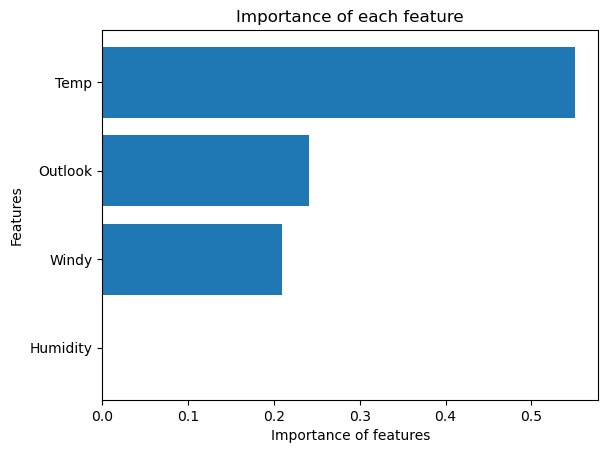

In [17]:
from matplotlib import pyplot as plt
imp = clf.feature_importances_
names = dataframe.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=5)
clf = clf.fit(X,y)
target_names=np.array(['No','Yes'])

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=columns,class_names=target_names,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(r"c:\temp\Weather_PlayGolf3_gini.pdf")

True

In [19]:
dataframe.head()

,Outlook,Temp,Humidity,Windy,Play
0,1,85,85,0,No
1,1,80,90,1,No
2,0,83,78,0,Yes
3,2,70,96,0,Yes
4,2,68,80,0,Yes


In [20]:
from sklearn import preprocessing
ohenc = preprocessing.OneHotEncoder()
ohenc.fit(dataframe['Outlook'].values.reshape(-1,1))

OneHotEncoder()

In [21]:
outlook_oh=ohenc.transform(dataframe['Outlook'].values.reshape(-1,1))
outlook_oh.toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [22]:
#多個欄位一次進行oneHot Encoding
#需要使用columns參數
pd.get_dummies(dataframe[['Outlook','Windy']],columns=['Outlook','Windy'])

,Outlook_0,Outlook_1,Outlook_2,Windy_0,Windy_1
0,0,1,0,1,0
1,0,1,0,0,1
2,1,0,0,1,0
3,0,0,1,1,0
4,0,0,1,1,0
5,0,0,1,0,1
6,1,0,0,0,1
7,0,1,0,1,0
8,0,1,0,1,0
9,0,0,1,1,0


In [23]:
#單一欄位進行OneHot Encoding,可以使用perfix參數設定欄位名稱前綴
pd.get_dummies(dataframe['Windy'],prefix='Windy')

,Windy_0,Windy_1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [24]:
df1_features = pd.DataFrame(dataframe.drop('Play',axis=1))
df1_labels = pd.DataFrame(dataframe['Play'])

In [25]:
df1_onehot=pd.get_dummies(df1_features,columns=['Outlook','Windy'])

In [26]:
df1_onehot

,Temp,Humidity,Outlook_0,Outlook_1,Outlook_2,Windy_0,Windy_1
0,85,85,0,1,0,1,0
1,80,90,0,1,0,0,1
2,83,78,1,0,0,1,0
3,70,96,0,0,1,1,0
4,68,80,0,0,1,1,0
5,65,70,0,0,1,0,1
6,64,65,1,0,0,0,1
7,72,95,0,1,0,1,0
8,69,70,0,1,0,1,0
9,75,80,0,0,1,1,0


In [27]:
df1_labels

,Play
0,No
1,No
2,Yes
3,Yes
4,Yes
5,No
6,Yes
7,No
8,Yes
9,Yes


In [28]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=8)
clf = clf.fit(df1_onehot,df1_labels)
target_names=np.array(['No','Yes'])

dot_data = tree.export_graphviz(clf,out_file=None,feature_names=df1_onehot.columns,class_names=target_names,filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf(r"c:\temp\Weather_PlayGolf4_onehot.pdf")

True